#  Predicting House Prices
## Task 1

# Project # 1
## Overview:

## Objective: Build a model to predict house prices based on various features.

### Description: 
This project uses a dataset of emails labeled as spam or not spam to train a classifier that can automatically detect spam emails. The key steps include data cleaning and preprocessing (e.g., text preprocessing, tokenization), feature extraction (e.g., TF-IDF), model selection and training (e.g., Naive Bayes, SVM), and model evaluation and fine-tuning.

### Dataset:
The synthetic dataset is designed to enhance natural language processing skills. The data is taken form kiggle website.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis

In [2]:
# Load the data
data = pd.read_csv('final_data.csv')
# Display the first five rows of the dataset
print(data.head())

   NumStories    ParcelID  Height_Ft  FromH7 Residential Exemption  \
0         2.0  1301202000  24.459964       1                $0.00    
1         3.0  1301585000  36.200157       1                $0.00    
2         2.0  1503010000  14.679977       1            $3,610.53    
3         3.0  1301950000  26.040033       1                $0.00    
4         2.5  1502717000  14.950197       1            $3,610.53    

      AC Type                            Address Bath Style 1 Bath Style 2  \
0         NaN       8  CEYLON ST BOSTON MA 02125  Semi-Modern          NaN   
1         NaN      78  SAWYER AV BOSTON MA 02125          NaN          NaN   
2  Central AC        28  HIGH ST BOSTON MA 02122  Semi-Modern  Semi-Modern   
3         NaN  261  E COTTAGE ST BOSTON MA 02125  Semi-Modern  Semi-Modern   
4         NaN       27  TRULL ST BOSTON MA 02125  Semi-Modern  Semi-Modern   

  Bath Style 3  ...                                          formatted  \
0          NaN  ...  8 Ceylon Street

### Featuring Engineering

In [3]:
# Drop unnecessarly columns
columns_to_drop = [1, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15,18,19,20,21,25,26,29,30,31,32,33,36,38,40,42,43,44,47,48,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65]  # 1-based to 0-based: 1-1, 2-1, 4-1, 5-1, 7-1
data = data.drop(data.columns[columns_to_drop], axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4426 entries, 0 to 4425
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NumStories                   4426 non-null   float64
 1   Height_Ft                    4395 non-null   float64
 2   Bathrooms                    4032 non-null   float64
 3   Bedrooms                     4032 non-null   float64
 4   Exterior Condition           4032 non-null   object 
 5   Exterior Finish              4032 non-null   object 
 6   FY2024 Total Assessed Value  4426 non-null   object 
 7   Fireplaces                   4032 non-null   float64
 8   Foundation                   4032 non-null   object 
 9   Heat Type                    4023 non-null   object 
 10  Interior Condition           4032 non-null   object 
 11  Living Area                  4426 non-null   object 
 12  Lot Size                     4426 non-null   object 
 13  Number of Kitchens

In [5]:
# Remove rows with missing values in any column
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
cleaned_data = data.dropna()
len(cleaned_data)

4001

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4001 entries, 0 to 4425
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NumStories                   4001 non-null   float64
 1   Height_Ft                    4001 non-null   float64
 2   Bathrooms                    4001 non-null   float64
 3   Bedrooms                     4001 non-null   float64
 4   Exterior Condition           4001 non-null   object 
 5   Exterior Finish              4001 non-null   object 
 6   FY2024 Total Assessed Value  4001 non-null   object 
 7   Fireplaces                   4001 non-null   float64
 8   Foundation                   4001 non-null   object 
 9   Heat Type                    4001 non-null   object 
 10  Interior Condition           4001 non-null   object 
 11  Living Area                  4001 non-null   object 
 12  Lot Size                     4001 non-null   object 
 13  Number of Kitchens     

### Descriptive statistics


In [7]:
# Summary Statistics
cleaned_data.describe()

,NumStories,Height_Ft,Bathrooms,Bedrooms,Fireplaces,Number of Kitchens,Parking Spots,Total Rooms
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,2.500125,23.566063,2.470132,6.292177,0.191452,2.212197,2.093727,12.820045
std,0.549261,12.773847,0.895640,2.326985,0.568187,0.836487,2.017043,3.954125
min,1.000000,-4.767403,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000
25%,2.000000,12.291834,2.000000,5.000000,0.000000,1.000000,0.000000,10.000000
50%,2.500000,26.019974,3.000000,6.000000,0.000000,2.000000,2.000000,13.000000
75%,3.000000,33.722587,3.000000,8.000000,0.000000,3.000000,3.000000,15.000000
max,20.000000,75.639901,9.000000,19.000000,9.000000,4.000000,16.000000,27.000000


# Visualization

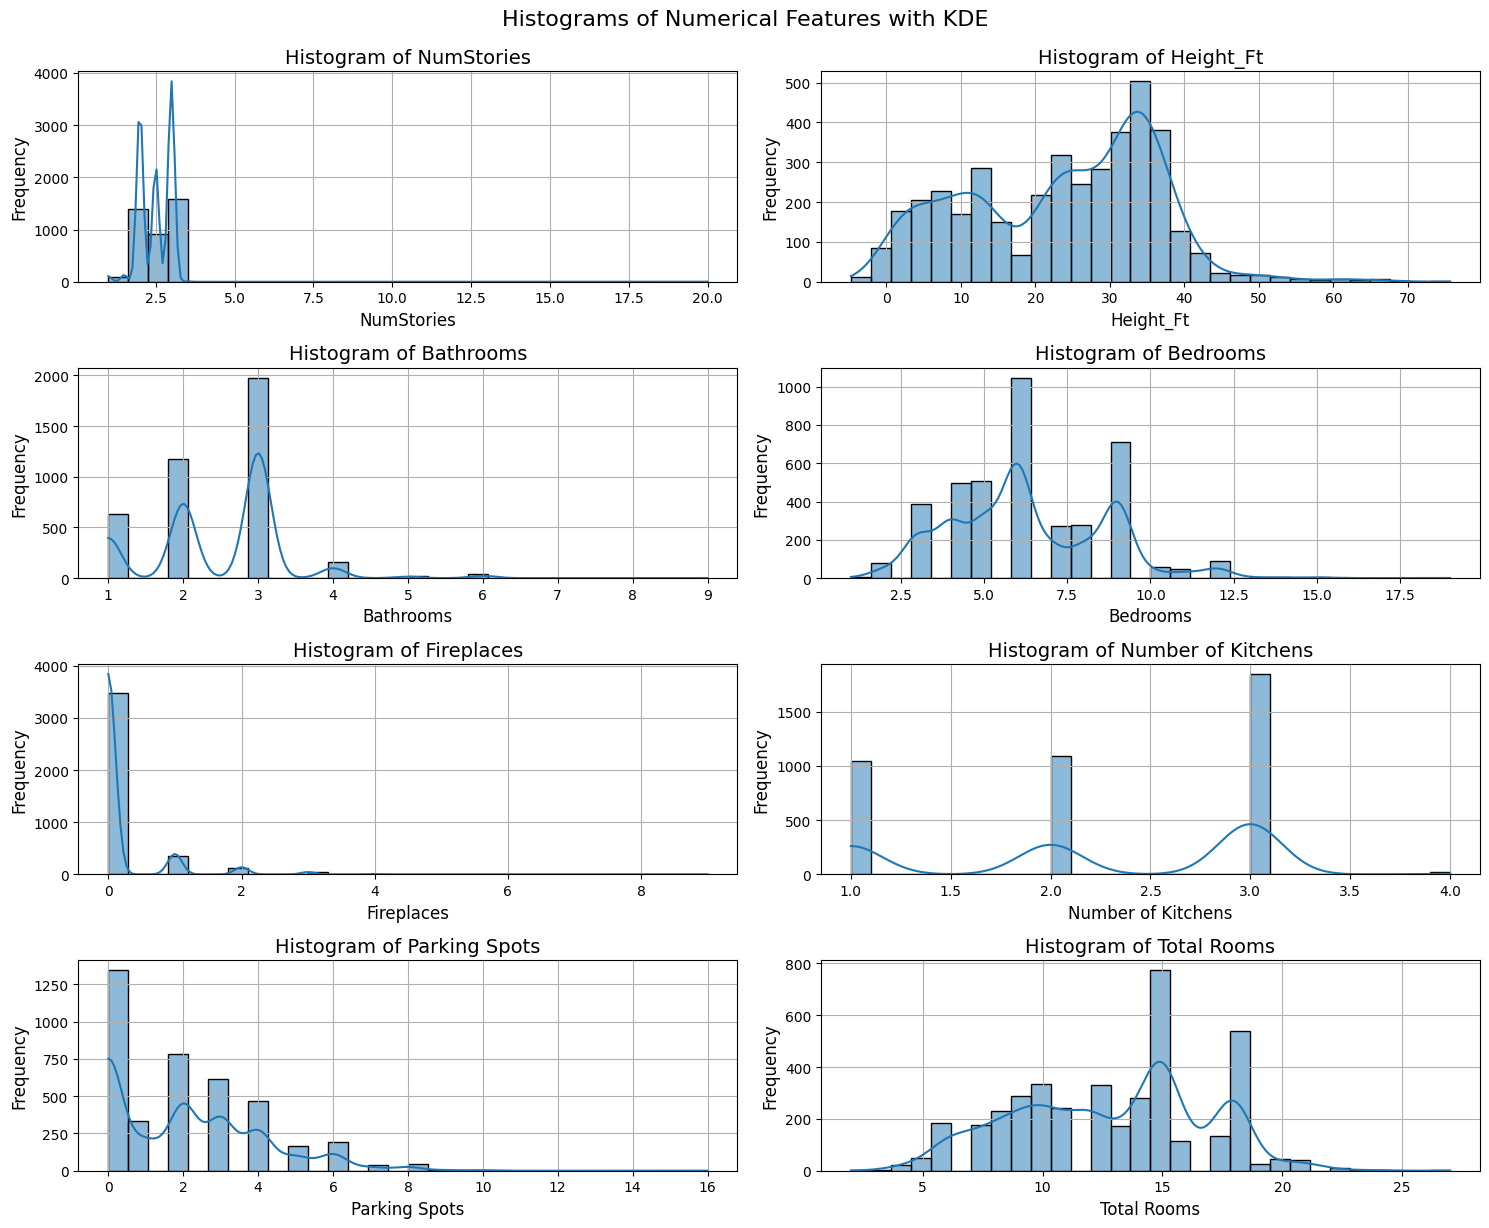

In [8]:
# Select numerical features
numerical_features = cleaned_data.select_dtypes(include=[np.number])

# Set the size of the figure and the layout of the subplots
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Loop through the numerical features and create a histogram for each
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot((len(numerical_features.columns) + 1) // 2, 2, i)
    sns.histplot(numerical_features[column], bins=30, edgecolor='black', kde=True)
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)

# Show the plot
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features with KDE', fontsize=16, y=1.02)
plt.show()


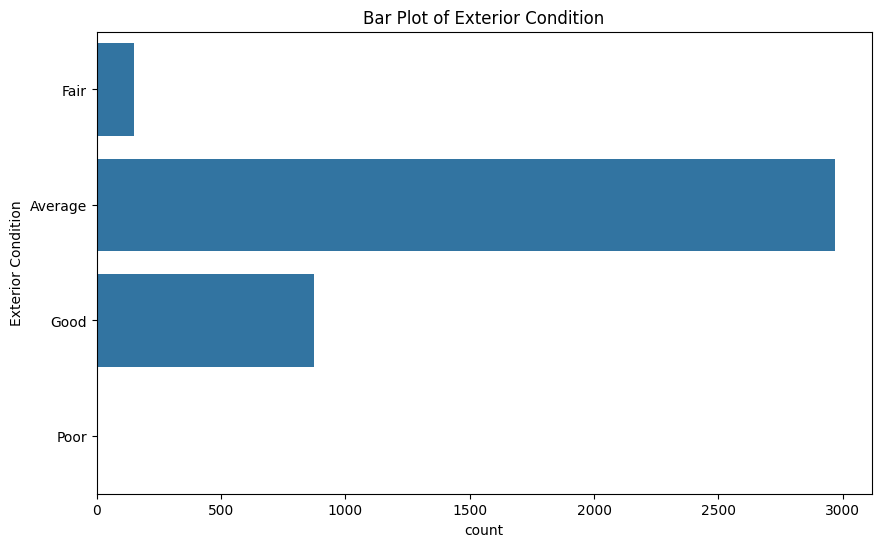

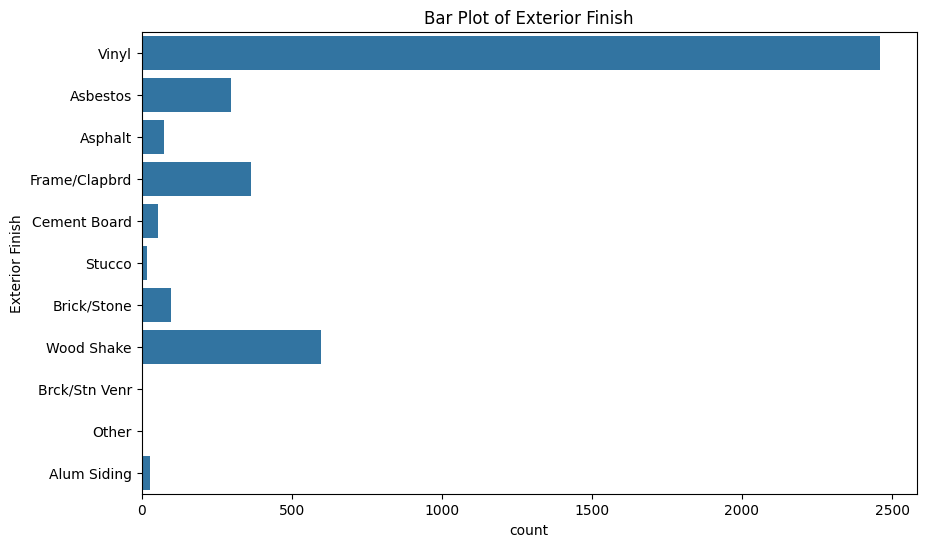

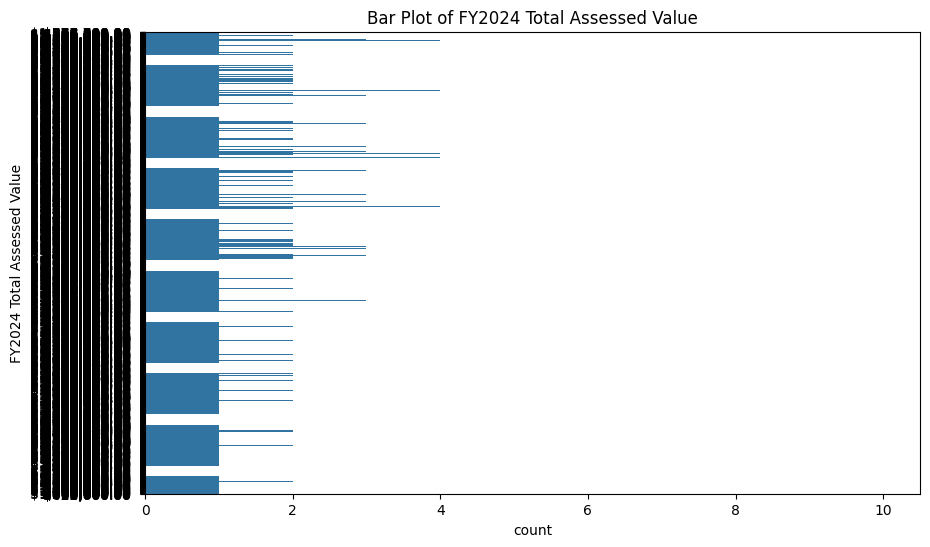

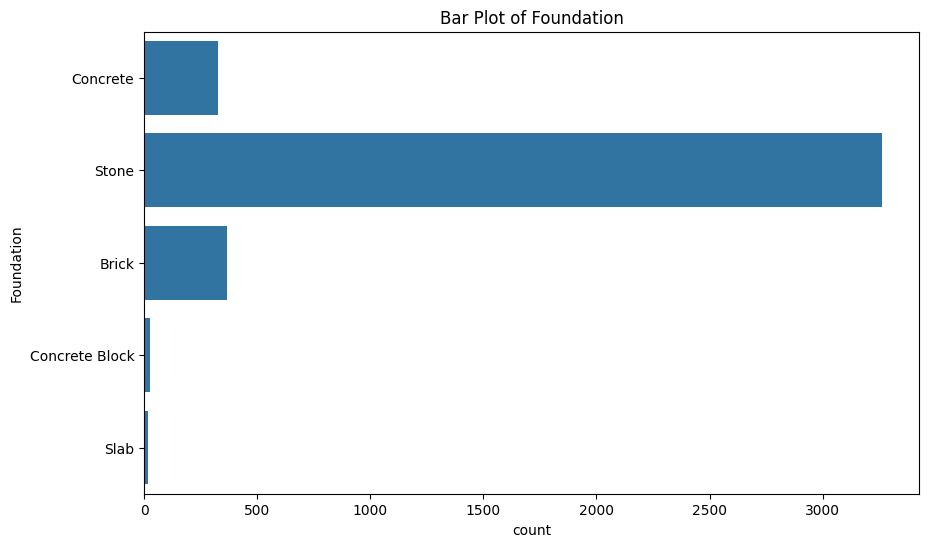

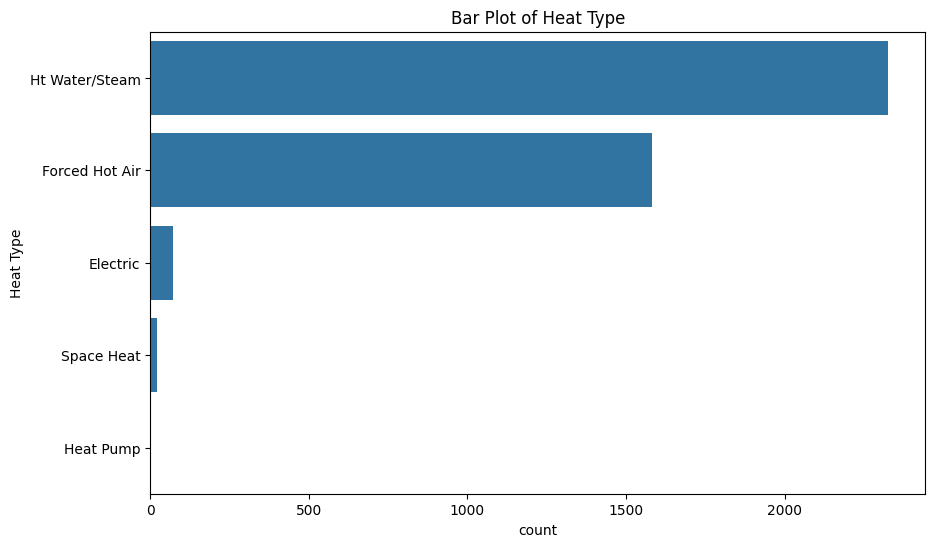

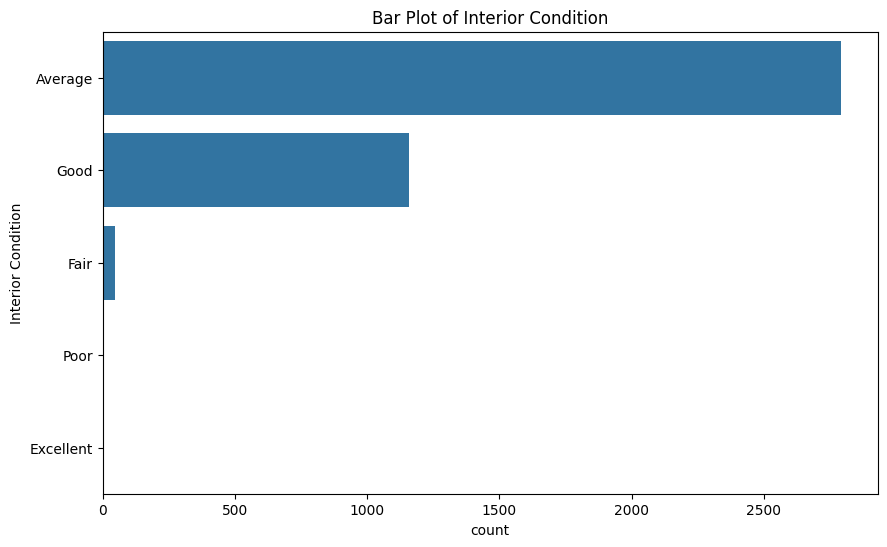

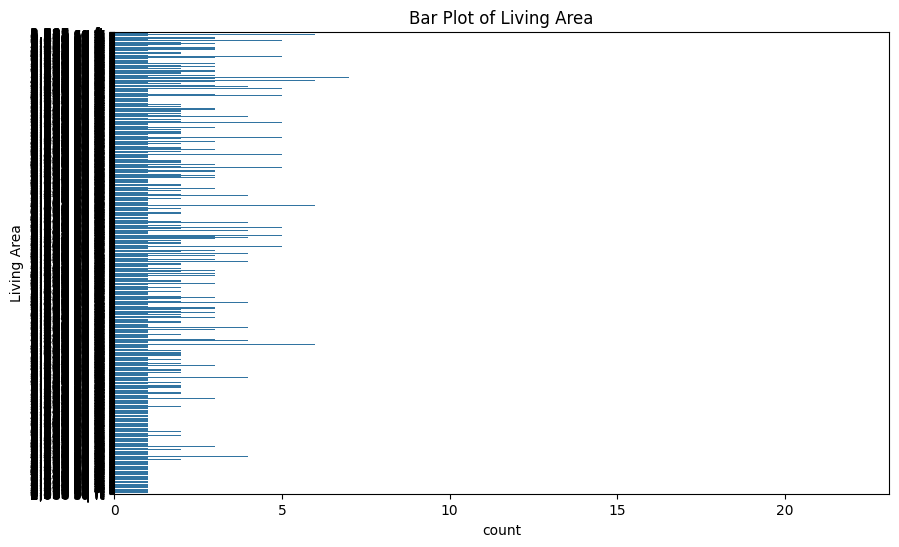

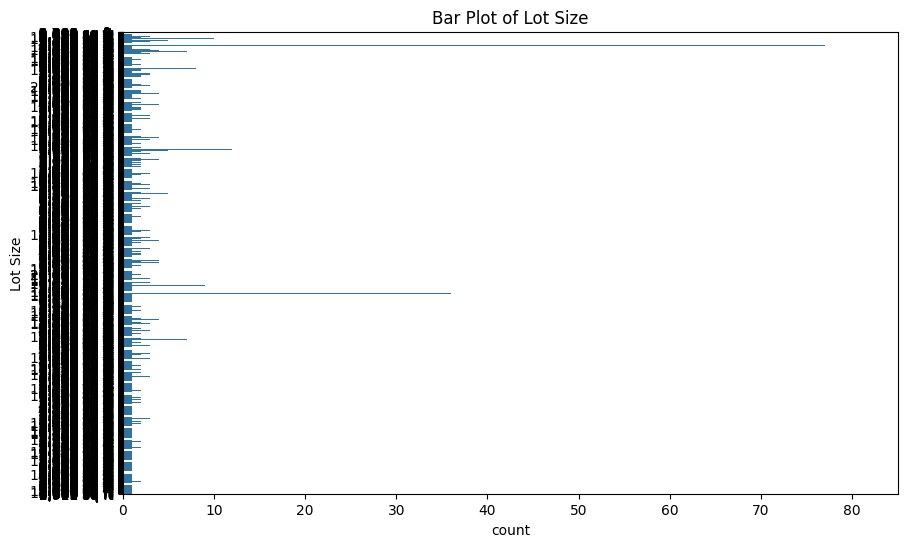

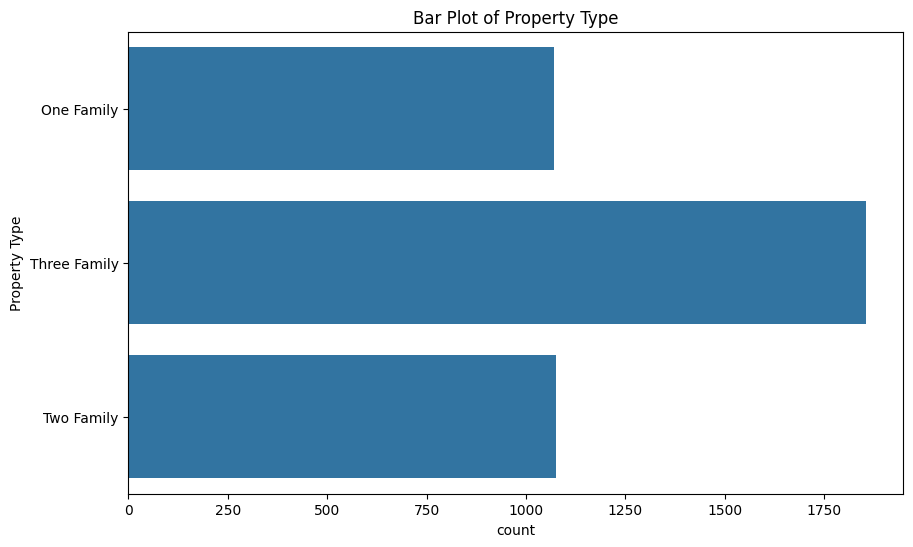

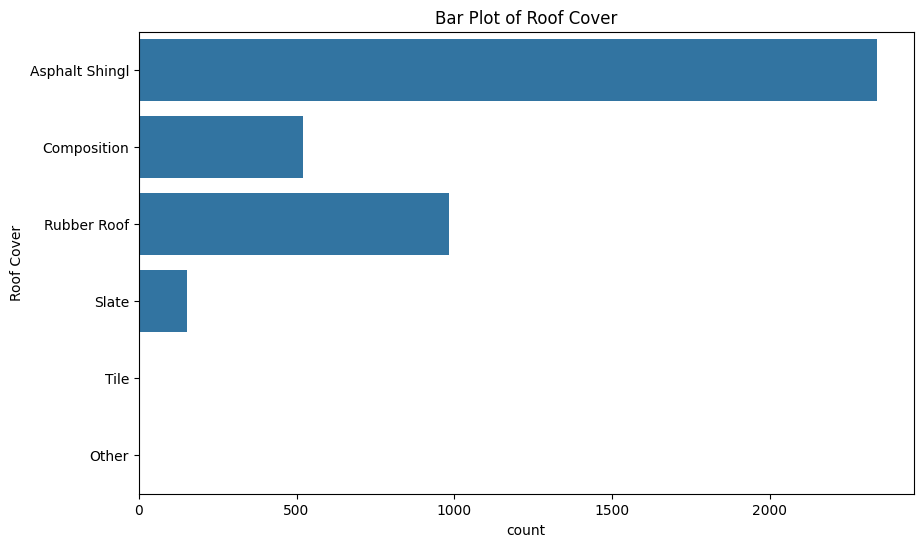

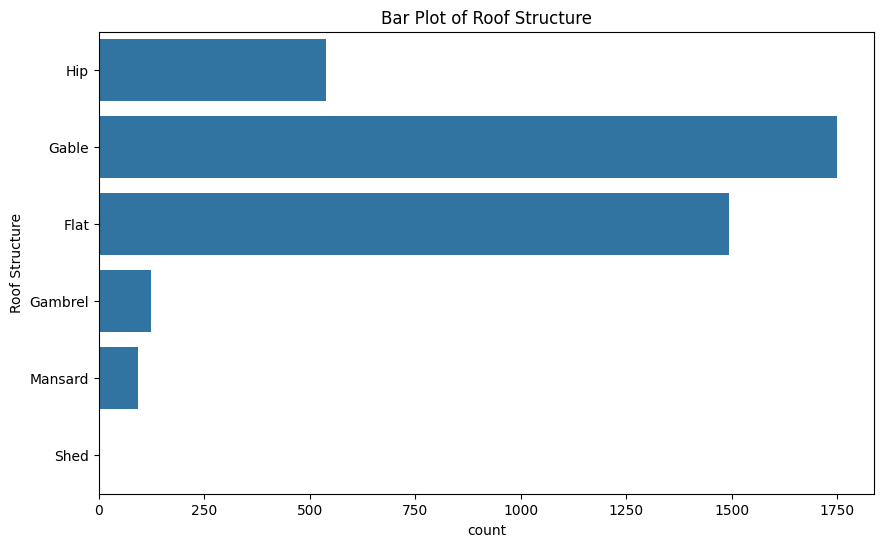

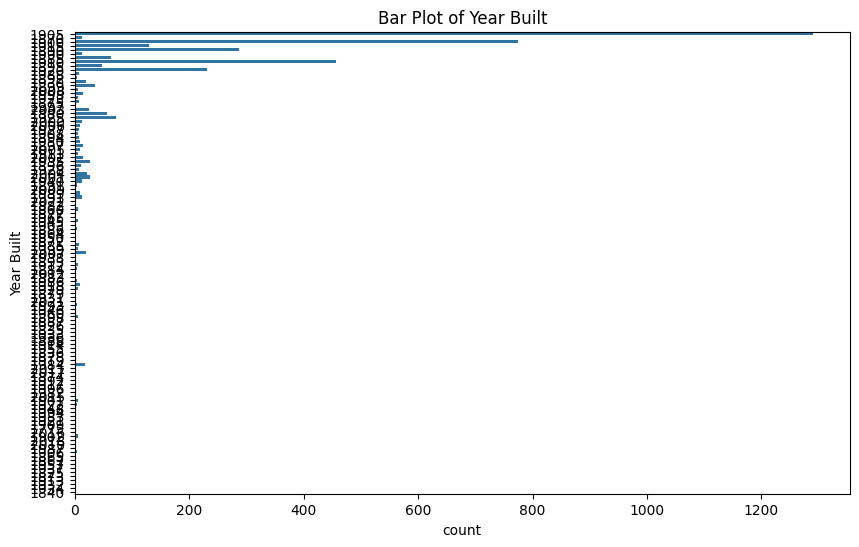

In [9]:
# Bar Plots for categorical features (if any)
categorical_features = cleaned_data.select_dtypes(include=[object])
for column in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=cleaned_data[column])
    plt.title(f'Bar Plot of {column}')
    plt.show()

In [10]:
# Function to convert area columns to float after removing 'sq ft' and commas
def convert_area_to_float(area_str):
    if isinstance(area_str, str):
        return float(area_str.replace(' sq ft', '').replace(',', ''))
    return area_str

# Function to convert currency columns to float after removing '$' and commas
def convert_currency_to_float(currency_str):
    if isinstance(currency_str, str):
        return float(currency_str.replace('$', '').replace(',', ''))
    return currency_str

In [11]:
# Apply the conversion functions to the respective columns
cleaned_data['FY2024 Total Assessed Value'] = cleaned_data['FY2024 Total Assessed Value'].apply(convert_currency_to_float)
cleaned_data['Living Area'] = cleaned_data['Living Area'].apply(convert_area_to_float)
cleaned_data['Lot Size'] = cleaned_data['Lot Size'].apply(convert_area_to_float)

# Convert 'Fireplaces' and 'Parking Spots' to object (string) type
cleaned_data['Fireplaces'] = cleaned_data['Fireplaces'].astype(str)
cleaned_data['Parking Spots'] = cleaned_data['Parking Spots'].astype(str)

C:\Users\Naveed\AppData\Local\Temp\ipykernel_2980\1568124780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['FY2024 Total Assessed Value'] = cleaned_data['FY2024 Total Assessed Value'].apply(convert_currency_to_float)
C:\Users\Naveed\AppData\Local\Temp\ipykernel_2980\1568124780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Living Area'] = cleaned_data['Living Area'].apply(convert_area_to_float)
C:\Users\Naveed\AppData\Local\Temp\ipykernel_2980\1568124780.py:4: SettingWi

## Correlation Analysis

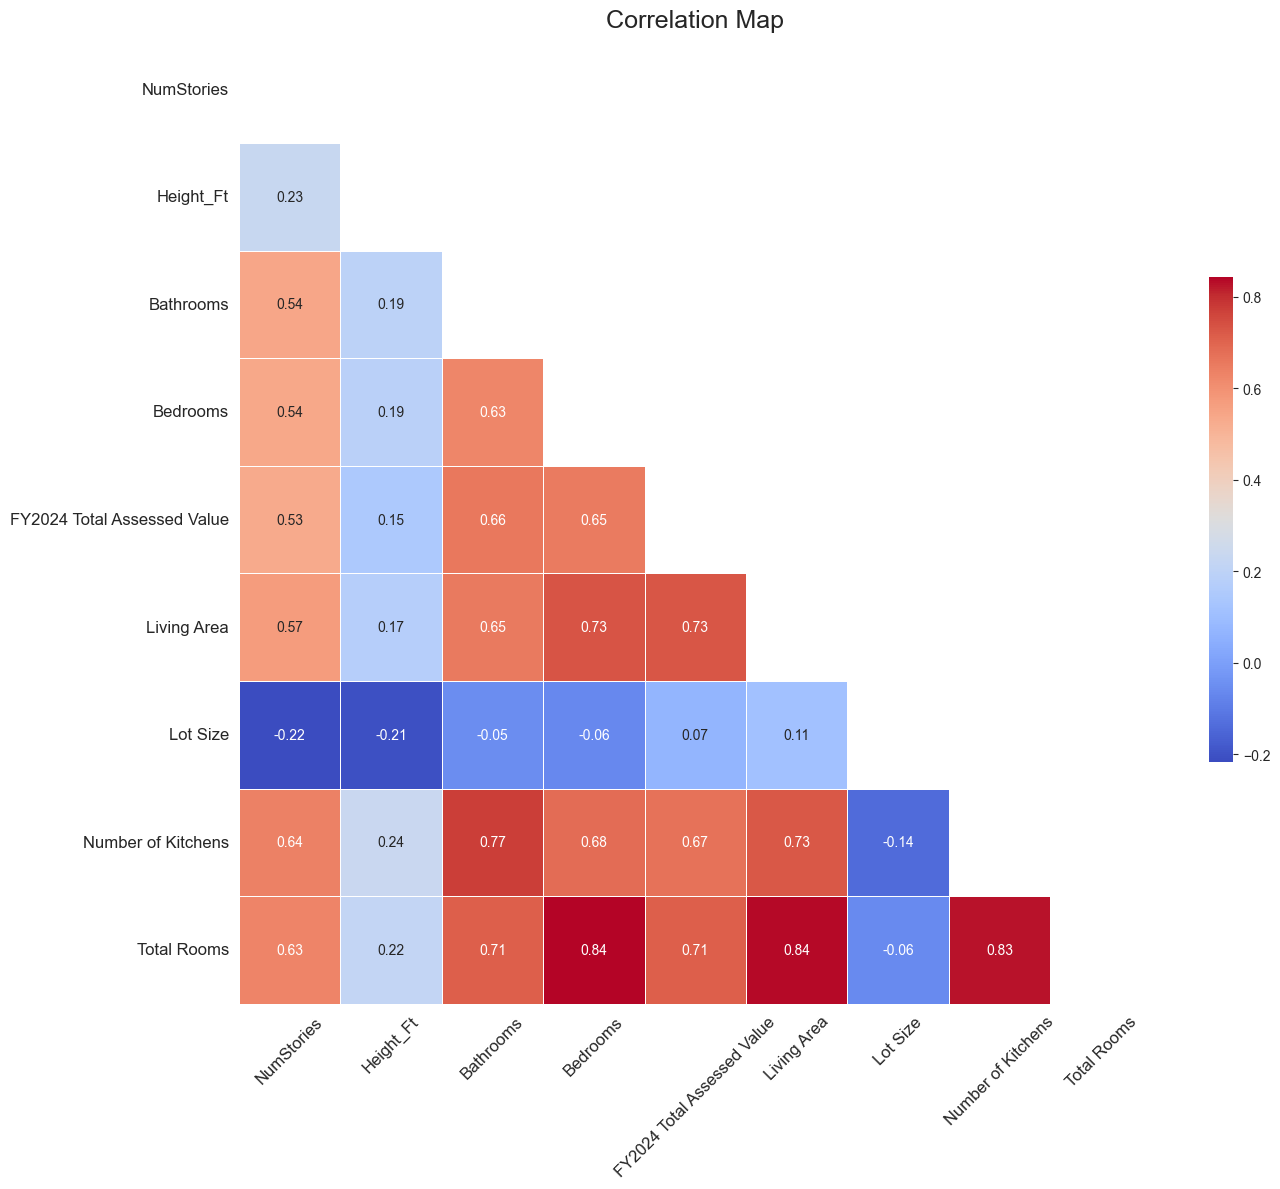

In [12]:
# Select only numeric columns
numerical_data = cleaned_data.select_dtypes(include=[np.number])

# Correlation Map
plt.figure(figsize=(14, 12))
correlation_matrix = numerical_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configure the seaborn style
sns.set_style('white')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=.5, cbar_kws={"shrink": .5})

# Add title and adjust layout for better readability
plt.title('Correlation Map', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


## Predictive Models

In [13]:
# Encode categorical variables
label_encoders = {}
for column in cleaned_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    cleaned_data[column] = label_encoders[column].fit_transform(cleaned_data[column])

C:\Users\Naveed\AppData\Local\Temp\ipykernel_2980\750838257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = label_encoders[column].fit_transform(cleaned_data[column])
C:\Users\Naveed\AppData\Local\Temp\ipykernel_2980\750838257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = label_encoders[column].fit_transform(cleaned_data[column])
C:\Users\Naveed\AppData\Local\Temp\ipykernel_2980\750838257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

### Splitting Data

In [14]:
# Define the target variable and features
X = cleaned_data.drop('FY2024 Total Assessed Value', axis=1)
y = cleaned_data['FY2024 Total Assessed Value']

In [15]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear regression

In [16]:
models = {
    'Linear Regression': LinearRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MAE: {mae}, MAPE: {mape}%, RMSE: {rmse}, R2: {r2}")
    

Linear Regression - MAE: 116286.90094501353, MAPE: 15.533726554434038%, RMSE: 157549.2038988326, R2: 0.6595286251609174
